In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn import metrics
import itertools
from sklearn.metrics import precision_score,recall_score

In [2]:
df = pd.read_csv("/home/elodin/S22_Fake-News-Detection-Using-Natural-Language-Processing/fake_or_real_news.csv",encoding = "ISO-8859-1")
df.title.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df.text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df.columns = ['#words','title','text','label']
df.dropna(how='any')
df.head()


adf=df.copy()
for i in range(6335):
    if adf.loc[i,'label'] == 'REAL':
        adf.loc[i,'label'] = 1
    else:
        adf.loc[i,'label'] = 0
adf.head()


,#words,title,text,label
0,8476,You Can Smell Hillarys Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"Kaydee King (@KaydeeKing) November 9, 2016 Th...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [3]:
X = adf['text']
y = adf['label']
print(X.head(),y.head())
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print(X_train.head(),X_test.head(),y_train.head(),y_test.head())


0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3     Kaydee King (@KaydeeKing) November 9, 2016 Th...
4    It's primary day in New York and front-runners...
Name: text, dtype: object 0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int64
5233    Dont worry about Hillary: BuzzFeed confirms sh...
4285    26 Shares\n21 4 0 1\nA new video purportedly r...
3374    Corbett  11/12/2016  20 Comments \nThe voting ...
4640    Get short URL 0 18 0 0 As many as 97 people ar...
5787    Remy Porter Remy escaped the enterprise world ...
Name: text, dtype: object 3789    Watch the above reports by CBN's David Brody a...
733      Bernie Sanders (@BernieSanders) October 27, 2...
4783    \nAs of October 29, there have been at least 1...
3067    Members of Congress have said that if Hillary ...
5288    Julian Zelizer is a professor of history and p...
Name: text, dtype: object 5233  

In [4]:
tfidf_vect = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vect.fit_transform(X_train,y_train)
tfidf_test = tfidf_vect.transform(X_test)

In [5]:
count_vect= CountVectorizer()
count_train = count_vect.fit_transform(X_train,y_train)
count_test = count_vect.transform(X_test)


In [6]:
n_vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
n_train = n_vect.fit_transform(X_train)
n_test = n_vect.transform(X_test)


In [7]:
vectorizer = [tfidf_vect,count_vect,n_vect]
vectorizer_train = [tfidf_train,count_train,n_train]
vectorizer_test = [tfidf_test,count_test,n_test]
zip_vect = zip(vectorizer_train,vectorizer_test,vectorizer)

In [8]:
def NaiveBayes(nlp_train,y_train,nlp_test,y_test):
    clf = MultinomialNB(alpha=0.5, fit_prior=True)
    clf.fit(nlp_train,y_train)
    sc1 = clf.score(nlp_test,y_test)
    print("The Score is: ")
    print(sc1)
    pred = clf.predict(nlp_test)
    ps = precision_score(y_test,pred)
    rs = recall_score(y_test,pred)
    print("The Precision Score(Type 1) is:")
    print(ps)
    print("The Recall Score(Type 2) is:")
    print(rs)
    cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
    plot_confusion_matrix(cm, classes=[0, 1])
    return sc1,ps,rs


In [9]:
def Logreg(nlp_train,y_train,nlp_test,y_test,nlp_vect):
    i=1
    logreg = LogisticRegression(C=9)
    logreg.fit(nlp_train,y_train)
    sc = logreg.score(nlp_test,y_test)
    print("The Score is: ")    
    print(sc)
    pred = logreg.predict(nlp_test)
    ps = precision_score(y_test,pred)
    rs = recall_score(y_test,pred)
    print("The Precision Score(Type 1) is:")
    print(ps)
    print("The Recall Score(Type 2) is:")
    print(rs)
    cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
    plot_confusion_matrix(cm, classes=[0, 1])
    realest_and_fakest(nlp_vect, logreg, n=10)
    return sc,ps,rs


In [10]:
def RForest(nlp_train,y_train,nlp_test,y_test):
    clf1 = RandomForestClassifier(max_depth=50, random_state=0,n_estimators=25)
    clf1.fit(nlp_train,y_train)
    sc2 = clf1.score(nlp_test,y_test)
    print("The Score is: ")    
    print(sc2)
    pred = clf1.predict(nlp_test)
    ps = precision_score(y_test,pred)
    rs = recall_score(y_test,pred)
    print("The Precision Score(Type 1) is:")
    print(ps)
    print("The Recall Score(Type 2) is:")
    print(rs)
    cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
    plot_confusion_matrix(cm, classes=[0, 1])
    return sc2,ps,rs

In [11]:
def VectMachine(nlp_train,y_train,nlp_test,y_test):
    clf3 = SVC(C=100, gamma=0.1)
    clf3.fit(nlp_train, y_train)
    sc3 = clf3.score(nlp_test,y_test)
    print("The Score is: ")
    print(sc3)
    pred = clf3.predict(nlp_test)
    ps = precision_score(y_test,pred)
    rs = recall_score(y_test,pred)
    print("The Precision Score(Type 1) is:")
    print(ps)
    print("The Recall Score(Type 2) is:")
    print(rs)
    cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
    plot_confusion_matrix(cm, classes=[0, 1])
    return sc3,ps,rs

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [13]:
def realest_and_fakest(vectorizer, classifier, n):

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    plt.figure()
    x_pos=[]
    y_pos=[]
    for coef, feat in (topn_class1):
        x_pos.append(feat)
        y_pos.append(coef)

    #y_pos = classifier.coef_[0][:n]
    #x_pos = feature_names[:n]
    plt.bar(x_pos, y_pos, align='center', alpha=0.5, width=0.3, color='red')
    plt.xticks(x_pos, rotation=45)
    plt.ylabel('coeff')
    plt.xlabel('top fakest words')
    plt.title('FAKE WORDS')
    #plt.ylim(-12,-8)
    #print(y_pos)
    
    #print()
    x_pos1=[]
    y_pos1=[]
    for coef, feat in reversed(topn_class2):
        x_pos1.append(feat)
        y_pos1.append(coef)
    plt.figure()
    plt.bar(x_pos1, y_pos1, align='center', alpha=0.5, width=0.3, color='blue')
    plt.xticks(x_pos1, rotation=45)
    plt.ylabel('coeff')
    plt.xlabel('top realest words')
    plt.title('REAL WORDS')


For TFIDF
For Multinomial Naive Bayes Model
The Score is: 
0.8603538976566236
The Precision Score(Type 1) is:
0.8006230529595015
The Recall Score(Type 2) is:
0.9661654135338346
Confusion matrix, without normalization
[[ 771  256]
 [  36 1028]]
For TFIDF
For Random Forest Classifiers
The Score is: 
0.8842659014825442
The Precision Score(Type 1) is:
0.8982558139534884
The Recall Score(Type 2) is:
0.8712406015037594
Confusion matrix, without normalization
[[922 105]
 [137 927]]
For TFIDF
For Support Vector Machine_Radial Basis Function Classifier
The Score is: 
0.9349593495934959
The Precision Score(Type 1) is:
0.9385633270321361
The Recall Score(Type 2) is:
0.9332706766917294
Confusion matrix, without normalization
[[962  65]
 [ 71 993]]
For TFIDF
For Logistic Regressor
The Score is: 
0.9330463892874223
The Precision Score(Type 1) is:
0.9408396946564885
The Recall Score(Type 2) is:
0.9266917293233082
Confusion matrix, without normalization
[[965  62]
 [ 78 986]]
For Count
For Multinomial

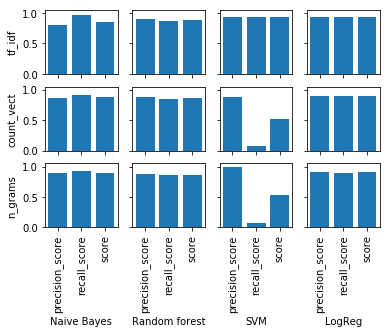

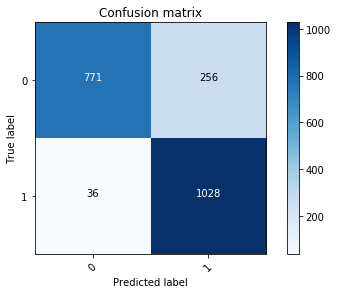

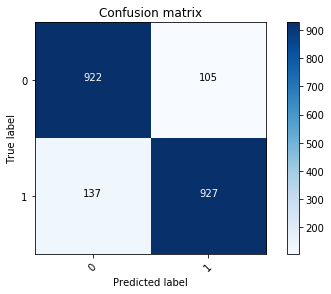

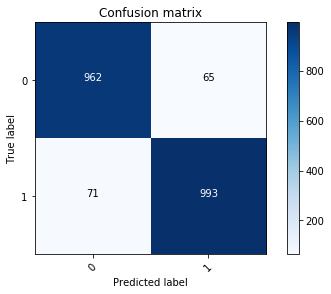

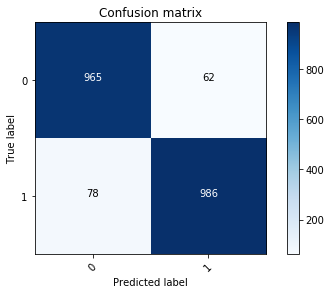

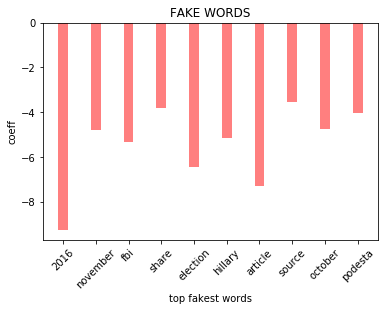

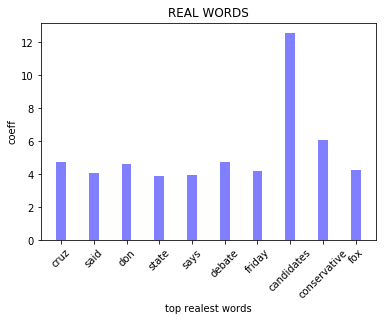

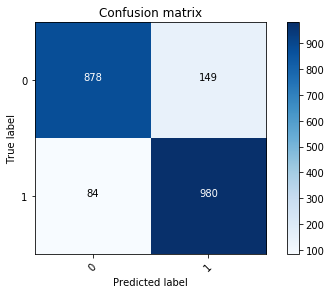

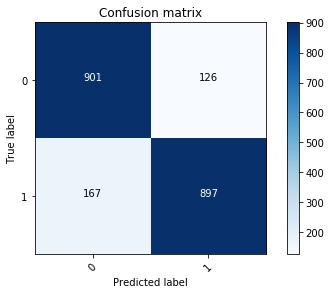

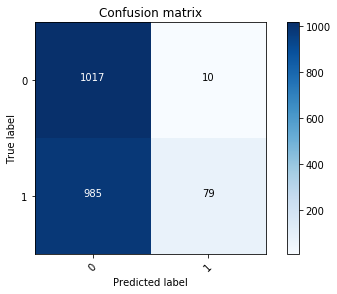

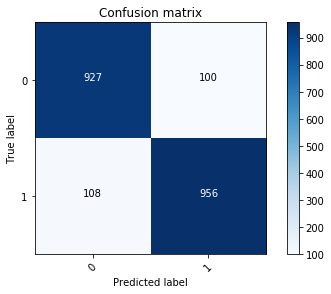

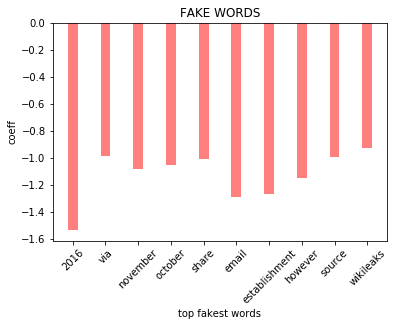

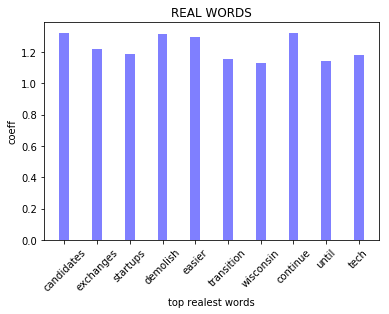

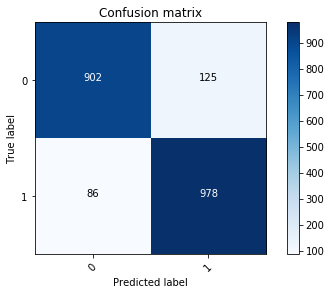

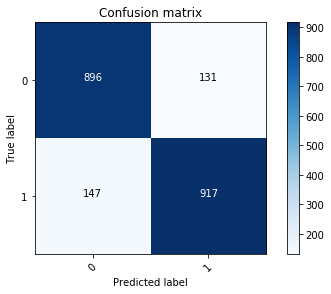

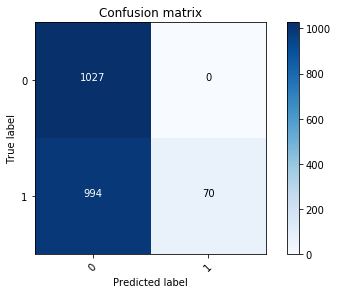

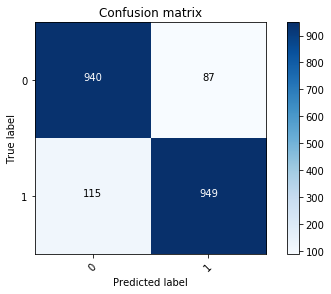

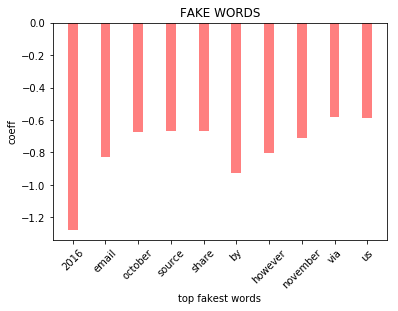

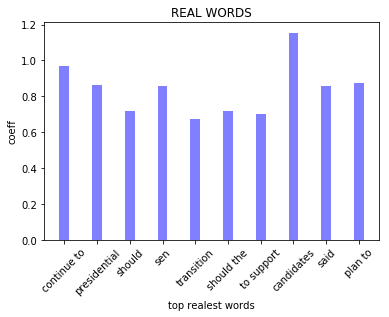

In [14]:
x = ['score','precision_score','recall_score']
fig, ax = plt.subplots(3,4,sharex=True,sharey=True)
ax[0,0].set_ylabel('tf_idf')
ax[1,0].set_ylabel('count_vect')
ax[2,0].set_ylabel('n_grams')
ax[2,0].set_xlabel('Naive Bayes')
ax[2,1].set_xlabel('Random forest')
ax[2,2].set_xlabel('SVM')
ax[2,3].set_xlabel('LogReg')

for i in range(0,4):
    for tick in ax[2,i].get_xticklabels():
            tick.set_rotation(90)
            
i=0    ########

for vect_train,vect_test,vect in zip_vect:
    j=0  ##########
    if(vect == tfidf_vect):
        print("For TFIDF")
    elif(vect == count_vect):
        print("For Count")
    else:
        print("Ngrams")
    
    print("For Multinomial Naive Bayes Model")
    y=NaiveBayes(vect_train,y_train,vect_test,y_test)       #### y=
    ax[i,j].bar(x,y)   #############
    j+=1               #############
    
    if(vect == tfidf_vect):
        print("For TFIDF")
    elif(vect == count_vect):
        print("For Count")
    else:
        print("Ngrams")

    
    print("For Random Forest Classifiers")   
    y=RForest(vect_train,y_train,vect_test,y_test)
    ax[i,j].bar(x,y)   #############
    j+=1               #############
    
    
    if(vect == tfidf_vect):
        print("For TFIDF")
    elif(vect == count_vect):
        print("For Count")
    else:
        print("Ngrams")
    
    
    print("For Support Vector Machine_Radial Basis Function Classifier")
    y=VectMachine(vect_train,y_train,vect_test,y_test)
    ax[i,j].bar(x,y)   #############
    j+=1               #############
    
    if(vect == tfidf_vect):
        print("For TFIDF")
    elif(vect == count_vect):
        print("For Count")
    else:
        print("Ngrams")
    
    
    print("For Logistic Regressor")
    y=Logreg(vect_train,y_train,vect_test,y_test,vect)
    ax[i,j].bar(x,y)   #############
    j+=1               #############
    
    i+=1       ############